# Nanodegree Engenheiro de Machine Learning
## Projeto final
Arthur Pimenta 
28 de maio de 2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
# Dados de treino
df_train = pd.read_csv("input/train.csv")
print(df_train.shape)

(404290, 6)


In [3]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
from prettytable import PrettyTable
from textwrap import fill

x = PrettyTable()
x.field_names = df_train.columns
for i in range(5):
    x.add_row([df_train.iloc[i][0], df_train.iloc[i][1], df_train.iloc[i][2], fill(df_train.iloc[i][3], width=40), fill(df_train.iloc[i][4], width=40), df_train.iloc[i][5]])
print(x)

+----+------+------+------------------------------------------+------------------------------------------+--------------+
| id | qid1 | qid2 |                question1                 |                question2                 | is_duplicate |
+----+------+------+------------------------------------------+------------------------------------------+--------------+
| 0  |  1   |  2   | What is the step by step guide to invest | What is the step by step guide to invest |      0       |
|    |      |      |        in share market in india?         |             in share market?             |              |
| 1  |  3   |  4   |  What is the story of Kohinoor (Koh-i-   |     What would happen if the Indian      |      0       |
|    |      |      |              Noor) Diamond?              |  government stole the Kohinoor (Koh-i-   |              |
|    |      |      |                                          |           Noor) diamond back?            |              |
| 2  |  5   |  6   |    

In [5]:
# from prettytable import PrettyTable
# from textwrap import fill

# x = PrettyTable()
# x.field_names = df_train.columns
# for i in range(5):
#     x.add_row([df_train.iloc[i][0], df_train.iloc[i][1], df_train.iloc[i][2], fill(question_preprocessing(df_train.iloc[i][3]), width=40), fill(question_preprocessing(df_train.iloc[i][4]), width=40), df_train.iloc[i][5]])
# print(x)

In [6]:
# Dados faltantes
null_columns = df_train.columns[df_train.isnull().any()]
values = df_train[null_columns].isnull().sum()

for c, v in zip(null_columns, values):
    print('Coluna: {}, Valores faltantes: {}'.format(c, v))

Coluna: question1, Valores faltantes: 1
Coluna: question2, Valores faltantes: 2


In [7]:
df_train.fillna('', inplace=True)

In [8]:
c = Counter()
c.update(df_train['qid1'].values)
c.update(df_train['qid2'].values)


In [9]:
c = Counter()
c.update(df_train['qid1'].values)
c.update(df_train['qid2'].values)

print('Número de perguntas que aparecem mais de uma vez: {}'.format(np.sum(np.array(list(c.values())) > 1)))

print('Número de perguntas: {}'.format(len(c)))

Número de perguntas que aparecem mais de uma vez: 111780
Número de perguntas: 537933


In [10]:
111780/537933

0.20779539459375052

In [11]:
question_freq = list(c.values())
question_freq = np.array(question_freq)

In [12]:
qids = np.concatenate([df_train['qid1'].values, df_train['qid2'].values], axis=0)
qids.shape

(808580,)

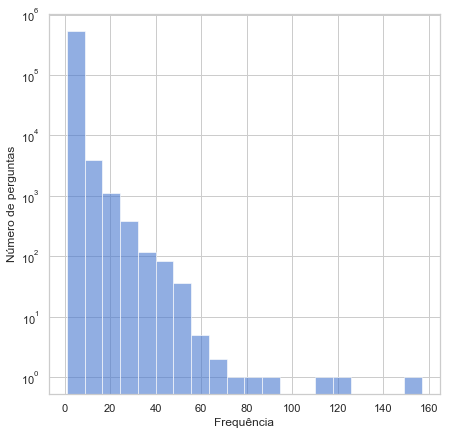

In [13]:
# bins = np.linspace(0, 20, 20)
sns.set(style="whitegrid", palette="muted", color_codes=True)

fig, ax = plt.subplots(figsize=(7, 7), sharex=True)
ax.hist(question_freq, alpha=0.6, bins=20)
ax.set_xlabel('Frequência')
ax.set_ylabel('Número de perguntas')
plt.yscale('log', nonposy='clip')
plt.show()

In [14]:
# Percentual de pares duplicadas na base de dados
duplicate_group = df_train.groupby('is_duplicate')['id'].count()
print('Perguntas duplicadas {}'.format(duplicate_group))

Perguntas duplicadas is_duplicate
0    255027
1    149263
Name: id, dtype: int64


In [15]:
print('Percentual de pares duplicados: {:.4f}%'.format(duplicate_group[1] / (duplicate_group.sum())))

Percentual de pares duplicados: 0.3692%


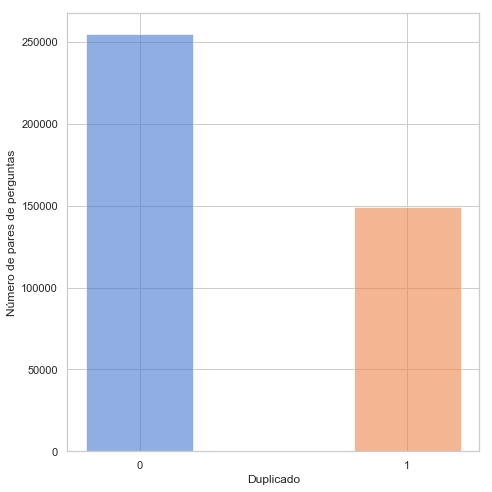

In [16]:
sns.set(style="whitegrid", palette="muted", color_codes=True)

fig, ax = plt.subplots(figsize=(7, 7), sharex=True)
# plt.style.context('seaborn')
ax.bar('0', duplicate_group[0], alpha=0.6, width=0.4)
ax.bar('1', duplicate_group[1], alpha=0.6, width=0.4)

# sns.barplot(['1'], duplicate_group[1])
# sns.barplot(['0'], duplicate_group[0])

ax.set_xlabel('Duplicado')
ax.set_ylabel('Número de pares de perguntas')
plt.tight_layout()

In [17]:
questions = pd.concat([df_train['question1'], df_train['question2']], axis=0)
questions.shape

(808580,)

In [18]:
df_train.drop(['id', 'qid1', 'qid2'], inplace=True, axis=1)

In [19]:
for i in range(5):
    print(df_train.iloc[i].question1)
    print(df_train.iloc[i].question2)
    print()

What is the step by step guide to invest in share market in india?
What is the step by step guide to invest in share market?

What is the story of Kohinoor (Koh-i-Noor) Diamond?
What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?

How can I increase the speed of my internet connection while using a VPN?
How can Internet speed be increased by hacking through DNS?

Why am I mentally very lonely? How can I solve it?
Find the remainder when [math]23^{24}[/math] is divided by 24,23?

Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
Which fish would survive in salt water?



In [20]:
from gensim.parsing.preprocessing import *
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
words = ['what', 'which', 'who', 'whom', 'when', 'where', 'why', 'how']
for w in words:
    stop_words.remove(w)

def question_preprocessing(question):
    question = question.lower()
    question = strip_punctuation(question)
    question = strip_numeric(question)
    question = strip_non_alphanum(question)
    question = strip_multiple_whitespaces(question)
    question = [w for w in question.split() if not w in stop_words]
    question = " ".join(question)
    question = strip_short(question, minsize=3)
    question = stem_text(question)
    
    return question

In [21]:
for i in range(5):
    print(question_preprocessing(df_train.iloc[i].question1))
    print(question_preprocessing(df_train.iloc[i].question2))
    print()

what step step guid invest share market india
what step step guid invest share market

what stori kohinoor koh noor diamond
what would happen indian govern stole kohinoor koh noor diamond back

how increas speed internet connect us vpn
how internet speed increas hack dn

why mental lone how solv
find remaind when math math divid

which on dissolv water quikli sugar salt methan carbon oxid
which fish would surviv salt water



In [22]:
df_train.question1 = df_train.question1.map(lambda q: question_preprocessing(q))
df_train.question2 = df_train.question2.map(lambda q: question_preprocessing(q))
df_train.head()

,question1,question2,is_duplicate
0,what step step guid invest share market india,what step step guid invest share market,0
1,what stori kohinoor koh noor diamond,what would happen indian govern stole kohinoor...,0
2,how increas speed internet connect us vpn,how internet speed increas hack dn,0
3,why mental lone how solv,find remaind when math math divid,0
4,which on dissolv water quikli sugar salt metha...,which fish would surviv salt water,0


In [23]:
# df_is_duplicate = df_train[df_train['is_duplicate'] == 1]
# df_is_not_duplicate = df_train[df_train['is_duplicate'] == 0]

In [24]:
size = 10000
df_train_balanced = pd.concat([df_train[df_train['is_duplicate'] == 1][:size], df_train[df_train['is_duplicate'] == 0][:size]])
df_train_balanced.shape

(20000, 3)

In [25]:
questions = pd.Series(pd.concat([df_train_balanced.question1, df_train_balanced.question2], axis=0).unique())
questions.shape

(34982,)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(questions)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [27]:
from scipy.spatial import distance

df_train_balanced['dist'] = df_train_balanced.apply(lambda x: distance.sqeuclidean(vectorizer.transform([x.question1]).toarray(), vectorizer.transform([x.question2]).toarray()), axis=1)

In [28]:
def word_share(row):
    w1 = set(row['question1'].split(' '))
    w2 = set(row['question2'].split(' '))  
    return 2 * len(w1 & w2)/(len(w1) + len(w2))

df_train_balanced['word_share'] = df_train_balanced.apply(word_share, axis=1)

In [29]:
df_train_balanced['q1_words'] = df_train_balanced.apply(lambda row: len(row['question1'].split(' ')), axis=1)
df_train_balanced['q2_words'] = df_train_balanced.apply(lambda row: len(row['question2'].split(' ')), axis=1)

In [30]:
df_train_balanced['q1_len'] = df_train_balanced.apply(lambda row: len(row['question1']), axis=1)
df_train_balanced['q2_len'] = df_train_balanced.apply(lambda row: len(row['question2']), axis=1)

In [31]:
idf = vectorizer.idf_
features_weight = dict(zip(vectorizer.get_feature_names(), idf))

In [32]:
'i' in features_weight

False

In [51]:
def word_share_weight(row):
    w1 = row['question1'].split(' ')
    w2 = row['question2'].split(' ')
    all_words = w1 + w2
    n = []
    for w in set(w1) & set(w2):
        if(w in features_weight):
            n.append(features_weight[w])
    
    d = []
    for w in all_words:
        if(w in features_weight):
            d.append(features_weight[w])
            
#     print(n[:10])
    n = np.array(n)
    n = np.sum(n)
    d = np.array(d)
    d = np.sum(d)
    return 2* n/d

df_train_balanced['word_share_weight'] = df_train_balanced.apply(word_share_weight, axis=1)

In [52]:
df_train_balanced.shape

(20000, 10)

In [53]:
df_train_balanced[df_train_balanced['word_share_weight']==0].shape

(1115, 10)

In [54]:
df_train_balanced.head()

,question1,question2,is_duplicate,dist,word_share,q1_words,q2_words,q1_len,q2_len,word_share_weight
5,astrolog capricorn sun cap moon cap rise what sai,tripl capricorn sun moon ascend capricorn what...,1,1.055979,0.666667,9,8,49,50,0.503926
7,how good geologist,what great geologist,1,0.500691,0.333333,3,3,18,20,0.574795
11,how read find youtub comment,how see youtub comment,1,0.631466,0.666667,5,4,28,22,0.656878
12,what make physic easi learn,how make physic easi learn,1,0.061480,0.800000,5,5,27,26,0.916942
13,what first sexual experi like,what first sexual experi,1,0.137941,0.888889,5,4,29,24,0.904839


In [88]:
# # Desenhe um mapa de calor com as correlações
# sns.set(style="whitegrid", palette="muted", color_codes=True)

# fig, ax = plt.subplots(figsize=(7, 7), sharex=True)

# df_heatpmap = df_train_balanced.drop(['question1', 'question2'], axis=1)
# df_heatpmap[['q1_words', 'q2_words', 'q1_len', 'aq2_len']] = df_heatpmap[['q1_words', 'q2_words', 'q1_len', 'q2_len']].apply(np.log, axis=1)

# sns.heatmap(df_heatpmap.corr(), annot=True, linewidths=1, ax=ax, cmap='YlGnBu',  vmin=0, vmax=1, alpha = 0.8)
# plt.tight_layout()

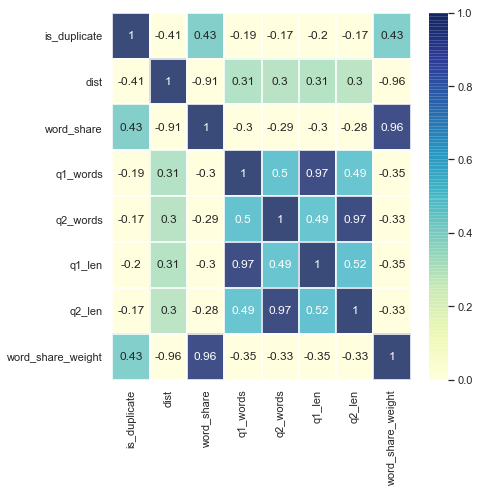

In [89]:
# Desenhe um mapa de calor com as correlações
sns.set(style="whitegrid", palette="muted", color_codes=True)

fig, ax = plt.subplots(figsize=(7, 7), sharex=True)

sns.heatmap(df_train_balanced.drop(['question1', 'question2'], axis=1).corr(), annot=True, linewidths=1, ax=ax, cmap='YlGnBu',  vmin=0, vmax=1, alpha = 0.8)
plt.tight_layout()

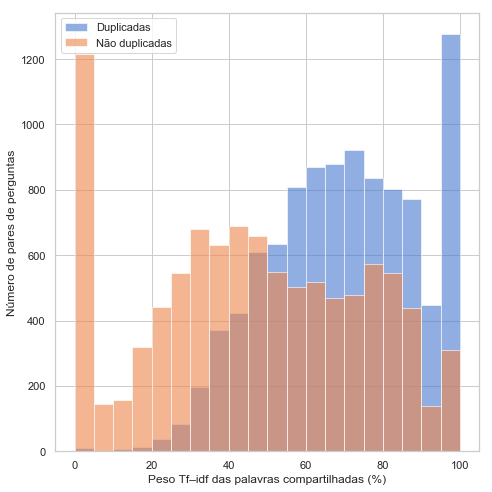

In [57]:
sns.set(style="whitegrid", palette="muted", color_codes=True)

fig, ax = plt.subplots(figsize=(7, 7), sharex=True)
# sns.despine(left=True)

# sns.distplot(df_train_balanced[df_train_balanced['is_duplicate'] == 1]['word_share'].values)
# sns.distplot(df_train_balanced[df_train_balanced['is_duplicate'] == 0]['word_share'].values)

ax.hist(df_train_balanced[df_train_balanced['is_duplicate'] == 1]['word_share_weight'].values * 100,  bins=20, alpha=0.6, label='1')
ax.hist(df_train_balanced[df_train_balanced['is_duplicate'] == 0]['word_share_weight'].values * 100,  bins=20, alpha=0.6, label='0')

ax.set_ylabel('Número de pares de perguntas')
ax.set_xlabel('Peso Tf–idf das palavras compartilhadas (%)')
ax.legend(['Duplicadas', 'Não duplicadas'])

# plt.setp(ax, yticks=[])
plt.tight_layout()

In [37]:
# sns.set(style="white", color_codes=True)

# custom_palette = sns.color_palette("muted")
# custom_palette[0] , custom_palette[1] = custom_palette[1] , custom_palette[0]

# sns.pairplot(df_train_balanced.drop(['question1', 'question2'], axis=1), hue='is_duplicate', hue_order=[0,1], diag_kind='hist', palette=custom_palette)

# plt.tight_layout()

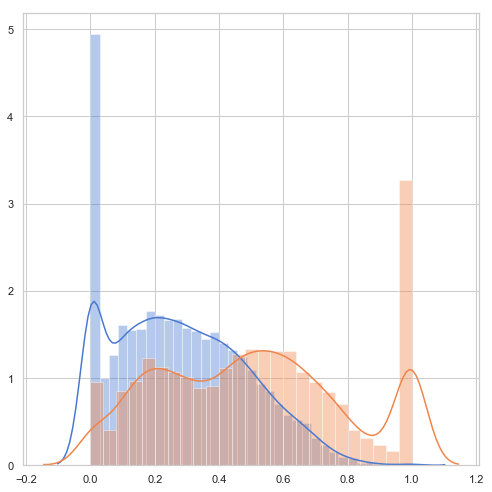

In [38]:
sns.set(style="whitegrid", palette="muted", color_codes=True)

bins = np.linspace(0, 1, 10)

highest_dist = np.max(df_train_balanced['dist'])

fig, ax = plt.subplots(figsize=(7, 7), sharex=True)

sns.distplot(df_train_balanced[df_train_balanced['is_duplicate'] == 1]['dist'].values/highest_dist, hist=True)
sns.distplot(df_train_balanced[df_train_balanced['is_duplicate'] == 0]['dist'].values/highest_dist, hist=True)

plt.tight_layout()

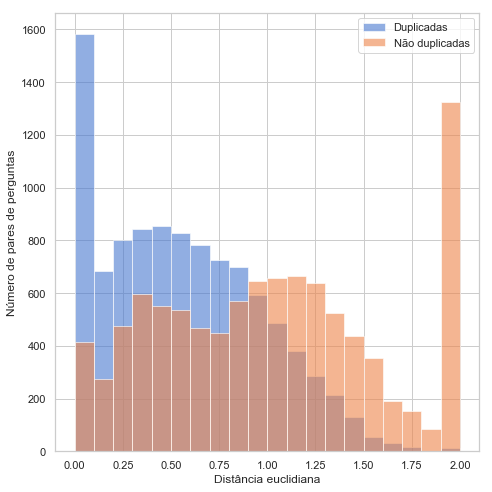

In [39]:
sns.set(style="whitegrid", palette="muted", color_codes=True)

bins = np.linspace(0, 1, 10)

highest_dist = np.max(df_train_balanced['dist'])
highest_dist = 1

fig, ax = plt.subplots(figsize=(7, 7), sharex=True)

ax.hist(df_train_balanced[df_train_balanced['is_duplicate'] == 1]['dist'].values/highest_dist, bins=20, alpha=0.6, label='1')
ax.hist(df_train_balanced[df_train_balanced['is_duplicate'] == 0]['dist'].values/highest_dist, bins=20, alpha=0.6, label='0')

ax.set_ylabel('Número de pares de perguntas')
ax.set_xlabel('Distância euclidiana')
ax.legend(['Duplicadas', 'Não duplicadas'])

plt.tight_layout()

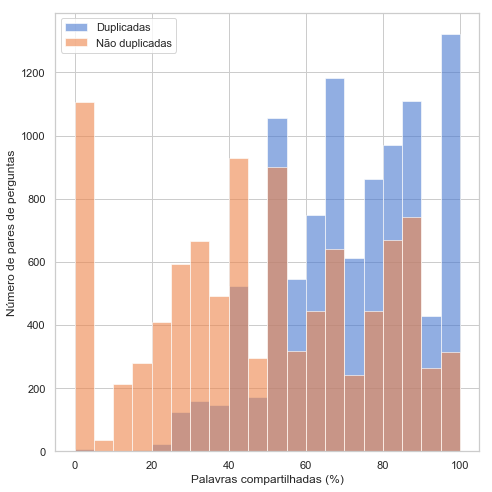

In [40]:
sns.set(style="whitegrid", palette="muted", color_codes=True)

fig, ax = plt.subplots(figsize=(7, 7), sharex=True)
# sns.despine(left=True)

# sns.distplot(df_train_balanced[df_train_balanced['is_duplicate'] == 1]['word_share'].values)
# sns.distplot(df_train_balanced[df_train_balanced['is_duplicate'] == 0]['word_share'].values)

ax.hist(df_train_balanced[df_train_balanced['is_duplicate'] == 1]['word_share'].values *100,  bins=20, alpha=0.6, label='1')
ax.hist(df_train_balanced[df_train_balanced['is_duplicate'] == 0]['word_share'].values *100,  bins=20, alpha=0.6, label='0')

ax.set_ylabel('Número de pares de perguntas')
ax.set_xlabel('Palavras compartilhadas (%)')
ax.legend(['Duplicadas', 'Não duplicadas'])

# plt.setp(ax, yticks=[])
plt.tight_layout()

In [41]:
from scipy.sparse import hstack

x_vec_q1 = vectorizer.transform(df_train['question1'].values)
x_vec_q2 = vectorizer.transform(df_train['question2'].values)

X = hstack((x_vec_q1, x_vec_q2))
y = df_train['is_duplicate'].values

print('Train {}'.format(X.shape))
print('Lable {}'.format(y.shape))

Train (404290, 26638)
Lable (404290,)


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
import xgboost as xgb

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=0)

dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# specify parameters via map
param = {'max_depth':2, 'eta':1, 'silent':0, 'objective':'binary:logistic', 'eval_metric':'logloss'}
num_round = 100
# watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# bst = xgb.train(param, dtrain, num_round, watchlist, early_stopping_rounds=50, verbose_eval=5)
bst = xgb.train(param, dtrain, num_round, verbose_eval=5)

In [43]:
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.metrics import log_loss

# make prediction
preds = bst.predict(dvalid)
best_preds = np.asarray([np.argmax(line) for line in preds])

print(precision_score(y_valid, best_preds, average='macro'))
print(log_loss(y_valid, best_preds))

0.31515835089489774
12.76840877381534


C:\Users\apimenta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
# submission
df_test = pd.read_csv("input/test.csv")

In [45]:
%%time
df_test.fillna('', inplace=True)

df_test['question1'] = df_test['question1'].map(lambda q: question_preprocessing(q))
df_test['question2'] = df_test['question2'].map(lambda q: question_preprocessing(q))

Wall time: 5min 17s


In [46]:
%%time
x_test_vec_q1 = vectorizer.transform(df_test['question1'].values)
x_test_vec_q2 = vectorizer.transform(df_test['question2'].values)

X_test = hstack((x_test_vec_q1, x_test_vec_q2))

print('Test {}'.format(X.shape))

Test (404290, 26638)
Wall time: 28.6 s


In [47]:
d_test = xgb.DMatrix(X_test)
p_test = bst.predict(d_test)

sub = pd.DataFrame()
sub['test_id'] = df_test['test_id']
sub['is_duplicate'] = p_test
sub.to_csv('submission2.csv', index=False)

ImportError: You must install graphviz to plot tree

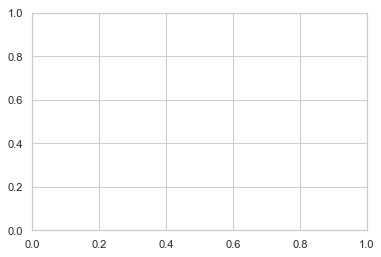

In [48]:
xgb.plot_tree(bst, num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
# fig = plt.gcf()
# fig.set_size_inches(50, 50)
plt.show()
# graph_to_save = xgb.to_graphviz(bst)
# graph_to_save.format = 'png'            
# graph_to_save.render('tree_saved')